# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline
# import numpy and pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
# Your code here:
fifa.head()


,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [4]:
def str_to_num(column):
    new_col=[]
    
    for i in column:  #para cada elemento de la serie de pandas
        
        if i.find('K')>0:                 #si encuentra K
            a=float(i.replace('K','').replace('€',''))
            result=a/1000                #divide entre mil para homologar con millones
            new_col.append(result)
            
        else:                            #si no encuentra K
            a=i.replace('€','').replace('M','')
            result=float(a)
            new_col.append(result)
    
    return new_col
    
fifa['ValueFloat']= str_to_num(fifa.Value)

In [5]:
fifa

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueFloat
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110.50
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77.00
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118.50
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72.00
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,Right,CM,2.0,...,57.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,0.06
18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,Right,ST,2.0,...,39.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,0.06
18204,B. Worman,16,England,47,67,Cambridge United,€60K,Right,ST,3.0,...,69.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,0.06
18205,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,Right,RW,3.0,...,60.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,0.06


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [7]:
# Your code here:
model_position=ols('ValueFloat ~ C(Position)', data=fifa).fit()  #Hace el fit entre Valor del jugador y posición

In [8]:
anova_position=sm.stats.anova_lm(model_position, typ=2)
anova_position

#COMMENTS= in the anova_position table result, we have a p value ('PR') quite small, we reject the null hypothesis on 
# the correlation of position and monetary value of the player, my guess is that forward position players are 
# more valuable)

,sum_sq,df,F,PR(>F)
C(Position),16496.092002,26.0,20.784194,5.517758e-96
Residual,553137.022264,18120.0,NaN,NaN


In [9]:
fifa.iloc[:,[7]]

,Preferred Foot
0,Left
1,Right
2,Right
3,Right
4,Right
...,...
18202,Right
18203,Right
18204,Right
18205,Right


In [10]:
fifa = fifa.rename(columns={'Preferred Foot': 'Preferred_Foot'})  # se cambió el nombre de la columna por que el comando 'C' no acepta spacebar

In [11]:
model_foot=ols('ValueFloat ~ C(Preferred_Foot)', data=fifa).fit()  #Hace el fit entre Valor del jugador y posición

In [12]:
anova_foot=sm.stats.anova_lm(model_foot, typ=2)
anova_foot

#COMMENTS-- pvalue for relationship between value and preferred foot has a small pvalue (0.0234 ) which
# tells us that there is a something going on between these two parameters. Having said that, we reject
# the null hypothesis)

,sum_sq,df,F,PR(>F)
C(Preferred_Foot),160.997350,1.0,5.132594,0.023492
Residual,569542.215531,18157.0,NaN,NaN


What is your conclusion from this ANOVA?

## Your conclusions here:

Given that for both preferred foot and position the p value is small, that tells us that there is a significant variance iwth these parameters and the value of the player, we rejected the null hypothesis in both cases




After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [13]:
# Your code here:
model_nation=ols('ValueFloat ~ C(Nationality)', data=fifa).fit()  #Hace el fit entre Valor del jugador y posición

anova_nation=sm.stats.anova_lm(model_nation, typ=2)
anova_nation

,sum_sq,df,F,PR(>F)
C(Nationality),32812.244217,163.0,6.762478,4.840477e-134
Residual,537095.118316,18043.0,NaN,NaN


## What is your conclusion from this ANOVA?

Nationality also has some effect on the value of the player, since the p value is so so small

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [14]:
# Your code here:
fifa.shape



(18207, 21)

In [15]:
fifa_wdf=fifa.copy()

fifa_wdf.dropna(axis=0, how='any', inplace=True)
fifa_wdf.shape

(17918, 21)

In [16]:
fifa_wdf.isnull().sum()

Name              0
Age               0
Nationality       0
Overall           0
Potential         0
Club              0
Value             0
Preferred_Foot    0
Position          0
Weak Foot         0
Acceleration      0
SprintSpeed       0
Stamina           0
Strength          0
LongShots         0
Aggression        0
Interceptions     0
Positioning       0
Vision            0
Penalties         0
ValueFloat        0
dtype: int64

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [17]:
# Your code here:
X = sm.add_constant(fifa_wdf[['SprintSpeed', 'Stamina']])  ### PENDIENTE REVISAR COMO HACER QUE FUNCIONE OLS con multiples variables
#X = sm.add_constant(auto[['cylinders', 'weight', 'acceleration']])

Y = fifa_wdf.ValueFloat

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             ValueFloat   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     453.4
Date:                Sun, 24 Jul 2022   Prob (F-statistic):          8.04e-193
Time:                        23:07:25   Log-Likelihood:                -55952.
No. Observations:               17918   AIC:                         1.119e+05
Df Residuals:                   17915   BIC:                         1.119e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.0700      0.197    -15.600      

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

### Your conclusions here:

As a whole, taking into account both variables stamina and sprintspeed, the F-test show big number, which predicts that the p-values of our variables will be slow, hence rejecting the null hypothesis. 

Despite what is said in the lines above, this linear regression of 2 variables cannot predict the value of a player. ¿How do we know this? Because the r-squared of the model is only 0.048 or 4.8%, which means that the model can only predict 4.8% of the value, the rest is dependent on many other parameters not accounted for in the linear regression. 


Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [18]:
# Your code here:

X=sm.add_constant(fifa.Potential)

Y=fifa.ValueFloat

model_potential= sm.OLS(Y,X).fit()

#potential_predict=model_potential.predict(X)  # para qué es esta linea

print(model_potential.summary())



                            OLS Regression Results                            
Dep. Variable:             ValueFloat   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     9049.
Date:                Sun, 24 Jul 2022   Prob (F-statistic):               0.00
Time:                        23:07:25   Log-Likelihood:                -53511.
No. Observations:               18207   AIC:                         1.070e+05
Df Residuals:                   18205   BIC:                         1.070e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -35.0517      0.395    -88.678      0.0

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

## Your conclusions here:

So the F statistic result value is quite big. So big of a value points out to the rejection of the null value (pending compareF value table)9  

From looking onto the p-value, i can see that we  reject the null hypothesis with a value of less thatn 0.000 which means that potential is a bad predictor of the ValueFloat atribute of the player.

And finally, looking at the r-squared value of 0.332, we can say that potential can account of 0.332 of the variation of the ValueFloat prediction.



Plot a scatter plot of value vs. potential. Do you see a linear relationship?

In [19]:
# Your code here:
#first we run the  linear regression with sciypy, then we plot with the results of said function

from scipy.stats import linregress


In [20]:
slope, intercept, r_value, p_value, std_err = linregress(fifa.Potential, fifa.ValueFloat)
slope, intercept, r_value, p_value, std_err

(0.5253653791668594,
 -35.05169049537542,
 0.5762182529816939,
 0.0,
 0.005522788307073677)

In [21]:
print('r value squared=', r_value**2)

r value squared= 0.33202747506927544


### As seen above, results of linregress match values given by statsmodels OLS summary

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

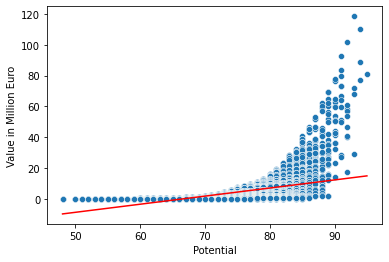

In [23]:
fig = plt.figure(facecolor='w')
sns.scatterplot(x=fifa.Potential, y=fifa.ValueFloat)
x = [fifa.Potential.min(), fifa.Potential.max()]
y = [intercept+fifa.Potential.min()*slope, intercept+fifa.Potential.max()*slope]
plt.ylabel('Value in Million Euro')
sns.lineplot(x=x, y=y, color='r');

### As shown above, a linear regression cannot represent the relationship between Potential and Monetary value of the players

Note: Monetary Value of the players is in Million Euro units